# Chapter 5. Resampling methods

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

## Lab

### The validation set approach

In [4]:
auto = pd.read_csv('data/auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [10]:

HTML(auto.to_html())

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [12]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(3), int64(5), object(1)
memory usage: 27.6+ KB


In [9]:
# 
auto.isna().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
year            False
origin          False
name            False
dtype: bool

In [23]:
# Select the data for training and testing
np.random.seed(123)
training = np.random.choice([False, True], size=392)
training

array([False,  True, False, False, False, False, False,  True,  True,
       False,  True,  True, False,  True, False,  True, False,  True,
        True, False, False, False,  True,  True,  True, False,  True,
       False, False, False, False,  True,  True,  True, False, False,
        True, False, False,  True, False,  True, False,  True,  True,
        True, False, False, False, False,  True,  True, False, False,
        True, False,  True, False, False,  True, False,  True, False,
        True, False, False, False, False,  True, False, False,  True,
        True,  True,  True, False, False, False, False,  True,  True,
       False, False, False, False,  True, False,  True,  True, False,
        True,  True,  True, False,  True,  True,  True, False, False,
       False,  True, False, False,  True,  True,  True, False,  True,
        True, False, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False, False,

In [24]:
print("Size of the trainig set: {}".format(len(training[training == True])))
print("size of the testing set: {}".format(len(training[training == False])))

Size of the trainig set: 203
size of the testing set: 189


In [61]:
# FOR x_TRAIN AND x_tEST WE add a constant which is a row of ones
X_train = sm.add_constant(auto['horsepower'][training])
X_test = sm.add_constant(auto['horsepower'][~training])
y_train = auto['mpg'][training]
y_test = auto['mpg'][~training]
linear_model = sm.OLS(y_train, X_train).fit()
linear_model.summary()


/home/sabin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     340.8
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           3.72e-45
Time:                        11:37:51   Log-Likelihood:                -612.51
No. Observations:                 203   AIC:                             1229.
Df Residuals:                     201   BIC:                             1236.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.0528      1.001     40.999      0.000      39.078      43.027
horsepower    -0.1657      0.009    -18.461      0.000      -0.183      -0.148
==============================================================================
Omnibus:                       12.262   Durbin-Watson:                   1.079
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.809
Skew:                           0.553   Prob(JB):                      0.00165
Kurtosis:                       3.540   Cond. No.                         320.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
y_pred = linear_model.predict(X_test)
print('Mean squared error: {0:.4f}'.format(mean_squared_error(y_test, y_pred)))

Mean squared error: 23.7722
Linear Model MSE =  23.77224394067168


In [64]:
### Fitting a quadratic model

X_train = sm.add_constant(np.column_stack((auto['horsepower'][training], auto['horsepower'][training]**2)))
X_test = sm.add_constant(np.column_stack((auto['horsepower'][~training], auto['horsepower'][~training]**2)))
q_model = sm.OLS(y_train, X_train).fit()
y_pred = q_model.predict(X_test)

print('Mean squared error: {0:.4f}'.format(mean_squared_error(y_test, y_pred)))
print('R-sq: {0:.4f}'.format(r2_score(y_test, y_pred)))

Mean squared error: 21.0126
R-sq: 0.6184


In [68]:
#### Fitting a cubic model

X_train = sm.add_constant(np.column_stack((auto['horsepower'][training],auto['horsepower'][training]**2, 
                                           auto['horsepower'][training]**3 )))
X_test = sm.add_constant(np.column_stack((auto['horsepower'][~training], auto['horsepower'][~training],
                                          auto['horsepower'][~training]**3)))

cubic_model = sm.OLS(y_train, X_train).fit()
y_pred = cubic_model.predict(X_test)
print('Mean squared error: {0:.4f}'.format(mean_squared_error(y_test, y_pred)))

Mean squared error: 2033.1213


In [72]:
# The MSE of the cubic model is considerable higher that MSE of the linear and quadtratic model, 
#which indicates that a cubic model tends to everfitt the data
cubic_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     184.5
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           3.18e-57
Time:                        11:53:22   Log-Likelihood:                -578.13
No. Observations:                 203   AIC:                             1164.
Df Residuals:                     199   BIC:                             1178.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.0483      6.036     11.109      0.000      55.146      78.950
x1            -0.6985      0.155     -4.512      0.000      -1.004      -0.393
x2             0.0029      0.001      2.356      0.019       0.000       0.005
x3         -3.725e-06   3.02e-06     -1.232      0.220   -9.69e-06    2.24e-06
==============================================================================
Omnibus:                        9.679   Durbin-Watson:                   1.211
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               18.409
Skew:                           0.149   Prob(JB):                     0.000101
Kurtosis:                       4.445   Cond. No.                     5.55e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.55e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### LOOCV (Leave one out cross validation)

In [103]:
X = auto['horsepower'].values
y = auto['mpg'].values
X = X.reshape(-1,1)

# We select 5 polynomial models and will check only MSE
order = np.arange(1,6)
mse_all = np.array([])
for index, ordr in enumerate(order):
    poly_model = PolynomialFeatures(degree=ordr, include_bias=False)
    linear_model = LinearRegression()
    linear_model.fit(poly_model.fit_transform(X),y)
    mse_all = np.append(mse_all, -np.mean(cross_val_score(linear_model, poly_model.fit_transform(X), y, 
                                                               scoring='neg_mean_squared_error', cv=len(X))))
    
print('MSE for all = ', mse_all)


MSE for all =  [24.23151352 19.24821312 19.33498406 19.42443031 19.0332129 ]


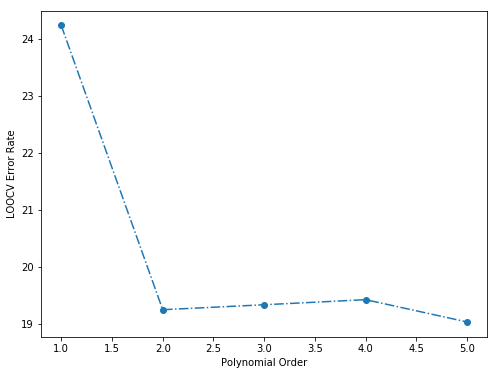

In [104]:
fig , ax = plt.subplots(figsize=(8,6))
ax.plot(order,mse_all,linestyle = '-.', marker='o');
ax.set_xlabel('Polynomial Order');
ax.set_ylabel('LOOCV Error Rate');

### K-Fold

MSE for all =  [27.43993365 21.23584006 21.33660618 21.35388698 20.90564175]


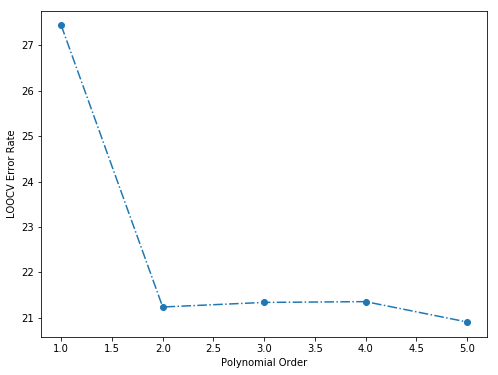

In [106]:
## Since LOOCV is a specific case of K-fold, the code is going to be similar, except that the cv parameter
#will be smaller

order = np.arange(1,6)
mse_all = np.array([])
for index, ordr in enumerate(order):
    poly_model = PolynomialFeatures(degree=ordr, include_bias=False)
    linear_model = LinearRegression()
    linear_model.fit(poly_model.fit_transform(X),y)
    mse_all = np.append(mse_all, -np.mean(cross_val_score(linear_model, poly_model.fit_transform(X), y, 
                                                               scoring='neg_mean_squared_error', cv=10)))
    
print('MSE for all = ', mse_all)

fig , ax = plt.subplots(figsize=(8,6))
ax.plot(order,mse_all,linestyle = '-.', marker='o');
ax.set_xlabel('Polynomial Order');
ax.set_ylabel('LOOCV Error Rate');

## Applied

In [108]:
default = pd.read_csv('data/default.csv')
default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [117]:
# In order to use the Logistic Regression we will have to modify the qualitative data into quantitative
default['default_yes'] = np.where(default['default']== "Yes",1,0)
default['student_yes'] = np.where(default['student'] == "Yes",1,0)

In [119]:
default.head()

,default,student,balance,income,default_yes,student_yes
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0
3,No,No,529.250605,35704.493935,0,0
4,No,No,785.655883,38463.495879,0,0


In [126]:
lg = smf.logit(formula='default_yes ~ balance + income', data=default).fit()
lg.summary()

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            default_yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Sat, 15 Feb 2020   Pseudo R-squ.:                  0.4594
Time:                        13:13:58   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                4.541e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
balance        0.0056      0.000     24.835      0.000       0.005       0.006
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [155]:
## b.)
X_train, X_test, y_train, y_test = train_test_split(X,y)
#We combine X_train with y_train to be able to use log reg from statsmodel
X_y_combined = X_train
X_y_combined['default_yes'] = y_train
model = smf.logit(formula='default_yes ~ balance + income', data=X_y_combined).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.079973
         Iterations 10


/home/sabin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            default_yes   No. Observations:                 7500
Model:                          Logit   Df Residuals:                     7497
Method:                           MLE   Df Model:                            2
Date:                Sat, 15 Feb 2020   Pseudo R-squ.:                  0.4528
Time:                        13:49:21   Log-Likelihood:                -599.80
converged:                       True   LL-Null:                       -1096.1
                                        LLR p-value:                2.918e-216
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.3540      0.490    -23.179      0.000     -12.314     -10.394
balance        0.0055      0.000     21.492      0.000       0.005       0.006
income      1.928e-05   5.64e-06      3.421      0.001    8.23e-06    3.03e-05
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [166]:
er = ((model.predict(X_test) > 0.5) == y_test).mean()
print("Validation error: {0:.4f}".format(1-er))

Validation error: 0.0260


In [167]:
## c.) for 3 validation sets

for _ in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    X_y_combined = X_train
    X_y_combined['default_yes'] = y_train
    model = smf.logit(formula='default_yes ~ balance + income', data=X_y_combined).fit()
    print(((model.predict(X_test) > 0.5) == y_test).mean())
    

/home/sabin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Optimization terminated successfully.
         Current function value: 0.076223
         Iterations 10
0.9696
Optimization terminated successfully.
         Current function value: 0.079477
         Iterations 10
0.9736
Optimization terminated successfully.
         Current function value: 0.078563
         Iterations 10
0.9736


In [169]:
### d.) with student in the model

X = default[['balance', 'income', 'student_yes']]
y = default['default_yes']
for _ in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    X_y_combined = X_train
    X_y_combined['default_yes'] = y_train
    model = smf.logit(formula='default_yes ~ balance + income + student_yes', data=X_y_combined).fit()
    print(((model.predict(X_test) > .5) == y_test).mean())



/home/sabin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Optimization terminated successfully.
         Current function value: 0.078108
         Iterations 10
0.9736
Optimization terminated successfully.
         Current function value: 0.080676
         Iterations 10
0.9752
Optimization terminated successfully.
         Current function value: 0.079100
         Iterations 10
0.9732


The errors looks similar to those from <i> c.) </i>.

### 6

In [170]:
model = smf.logit(formula='default_yes ~ balance + income', data=default).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            default_yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Sat, 15 Feb 2020   Pseudo R-squ.:                  0.4594
Time:                        14:14:38   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                4.541e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
balance        0.0056      0.000     24.835      0.000       0.005       0.006
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [185]:
##Bootstraping in pandas
df_params = pd.DataFrame(columns=['Intercept', 'balance', 'income'])
for _ in range(100):
    ##we take sample with the size len(default)
    default_sample = default.sample(len(default), replace=True)
    model_sample = smf.logit(formula='default_yes ~ balance + income', data=default_sample).fit(disp=0)
    df_params = df_params.append(model_sample.params, ignore_index=True)

In [191]:
##Bootstraped
print(df_params.mean(), df_params.std())

Intercept   -11.510182
balance       0.005631
income        0.000020
dtype: float64 Intercept    0.387589
balance      0.000202
income       0.000005
dtype: float64


In [192]:
## Mean and error of the model
print(model.params,model.bse)

## the bootstraped parameters have lower erros

Intercept   -11.540468
balance       0.005647
income        0.000021
dtype: float64 Intercept    0.434772
balance      0.000227
income       0.000005
dtype: float64


### 7

In [193]:
## a.)

weekly = pd.read_csv('data/weekly.csv')
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [223]:
weekly_modified = weekly.iloc[1:]
model = smf.logit(formula='Direction_Up ~ Lag1 + Lag2', data=weekly_modified).fit()
model.summary()


Optimization terminated successfully.
         Current function value: 0.683147
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Direction_Up   No. Observations:                 1088
Model:                          Logit   Df Residuals:                     1085
Method:                           MLE   Df Model:                            2
Date:                Sat, 15 Feb 2020   Pseudo R-squ.:                0.005387
Time:                        19:18:56   Log-Likelihood:                -743.26
converged:                       True   LL-Null:                       -747.29
                                        LLR p-value:                   0.01785
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2232      0.061      3.630      0.000       0.103       0.344
Lag1          -0.0384      0.026     -1.466      0.143      -0.090       0.013
Lag2           0.0608      0.027      2.291      0.022       0.009       0.113
==============================================================================
"""

In [228]:
print(model.predict(weekly[['Lag1',"Lag2"]].iloc[0]),"  " , weekly['Direction_Up'][0])

# the prediction is 0.57 while the true value is 0.

0    0.571392
dtype: float64    0


In [268]:
## d.)

error = np.zeros(len(weekly))
for i in range(len(weekly)):
    ignore = weekly.index.isin([i])
    weekly_modified = weekly.iloc[~ignore]
    model = smf.logit(formula='Direction_Up ~ Lag1 + Lag2', data=weekly_modified).fit(disp=0)
    y_pred = model.predict(weekly[['Lag1',"Lag2"]].iloc[i]).values
    y_pred = np.where(y_pred > 0.5,1,0)
    if (y_pred == (weekly['Direction_Up'][i])):
        error[i] = 1
        

In [270]:
error.mean()

0.5500459136822773

### 8

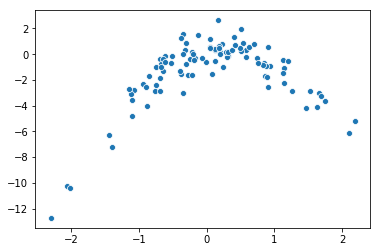

In [338]:
np.random.seed(1)
x = np.random.randn(100)
e = np.random.randn(100)
y = x - 2*x**2 + e



sns.scatterplot(x, y)
plt.show()

In [339]:
dataframe = pd.DataFrame(np.array([np.ones(len(x)),x,x**2,x**3,x**4,y]).T,
                         columns=["b0",'X',"X^2","X^3","X^4","y"])
dataframe.head()

,b0,X,X^2,X^3,X^4,y
0,1.0,1.624345,2.638498,4.285832,6.961671,-4.099779
1,1.0,-0.611756,0.374246,-0.228947,0.140060,-0.135741
2,1.0,-0.528172,0.278965,-0.147342,0.077822,-0.682611
3,1.0,-1.072969,1.151262,-1.235268,1.325403,-2.781913
4,1.0,0.865408,0.748930,0.648130,0.560897,-1.727365


In [340]:
## split the initial dataframe into X and y to make it easier for Linear regression
X = dataframe.iloc[:,:5]
y = dataframe.iloc[:,5]
model = LinearRegression()
errors = np.zeros((100,4))
for i in range(len(X)):
    ignore = ~X.index.isin([i])
    for x in range(4):
        model.fit(X.iloc[ignore,:x+2],y[ignore] )
        errors[i,x] = (model.predict([X.iloc[i, :x+2]]) - y[i]) ** 2
print("The average of the errors of all the models: ",errors.mean(axis=0))
        

The average of the errors of all the models:  [6.26076433 0.91428971 0.92687688 0.86691169]


In [336]:
# with a different seed 
np.random.seed(12)
x = np.random.randn(100)
e = np.random.randn(100)
y = x - 2*x**2 + e

dataframe = pd.DataFrame(np.array([np.ones(len(x)),x,x**2,x**3,x**4,y]).T,
                         columns=["b0",'X',"X^2","X^3","X^4","y"])

X = dataframe.iloc[:,:5]
y = dataframe.iloc[:,5]
model = LinearRegression()
errors = np.zeros((100,4))
for i in range(len(X)):
    ignore = ~X.index.isin([i])
    for x in range(4):
        model.fit(X.iloc[ignore,:x+2],y[ignore] )
        errors[i,x] = (model.predict([X.iloc[i, :x+2]]) - y[i]) ** 2
print("The average of the errors of all the models: ",errors.mean(axis=0))

The average of the errors of all the models:  [13.67185034  1.09179163  1.1155769   1.21622715]


With a different seed the results for the errors difers. In both cases the model with the biggests errors is the first one. This result was expected since the data was generated by using the second model and the firs model simply underfits the data. The smallest error are found in second model, which makes sense since this s how the data was generated.

In [347]:
## for p-value it is better to use statsmodels, scikit-learn doeas not provide an easy solutions for this
for i in range(4):
    model = sm.OLS(y, X.iloc[:,:i+2]).fit(disp=0)
    # print p-values for betas 
    print('   p-values ', model.pvalues)
    print("\n")

   p-values  b0    6.537813e-08
X     2.086914e-03
dtype: float64


   p-values  b0     2.450851e-01
X      4.299969e-17
X^2    1.433848e-41
dtype: float64


   p-values  b0     2.694979e-01
X      4.915377e-06
X^2    4.031567e-41
X^3    2.268118e-01
dtype: float64


   p-values  b0     2.300595e-02
X      2.628698e-06
X^2    4.506424e-17
X^3    1.231439e-01
X^4    1.667664e-02
dtype: float64




The p-values confirm the observations from the above.

### 9 

In [348]:
boston = pd.read_csv('data/boston.csv')
boston.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [349]:
#a 
boston['medv'].mean()

22.532806324110698

In [352]:
#b
boston['medv'].std()/np.sqrt(len(boston))

0.4088611474975351

In [359]:
#c

means = [boston['medv'].sample(len(boston), replace=True).mean() for i in range(1000)]
SE = np.std(means)
print(SE)

0.40661382880059005


In [361]:
#d
miu = boston['medv'].mean()

#Confidence interval
[miu - 2*SE, miu+2*SE]


[21.71957866650952, 23.346033981711876]

In [362]:
#e
boston['medv'].median()

21.2

In [372]:
#f
medians = [boston['medv'].sample(n = len(boston), replace=True).median() for i in range(1000)]
np.std(medians)

0.38360523653881445

In [364]:
#g
boston['medv'].quantile(.1)

12.75

Text(0, 0.5, 'Counts')

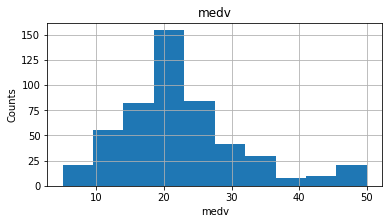

In [370]:
fig, ax1 = plt.subplots(figsize=(6,3))
boston.hist('medv',ax = ax1)
ax1.set_xlabel('medv')
ax1.set_ylabel('Counts')



In [373]:
#h
quantile_10th = [boston['medv'].sample(n = len(boston), replace=True).quantile(.1) for i in range(1000)]
np.std(quantile_10th)
# the standart error of 10% is a little bigger than the standart error of the median, 
#indicating that it is more variable

0.5104240173620359